<a href="https://colab.research.google.com/github/merlin-ribeiro/analisededadosemail/blob/main/atv_emails_Merlin_de_Souza_Ribeiro_Filho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <center> Instituto Federal de Educação, Ciência e Tecnologia da Paraíba - IFPB</center>
<center>Estatística Aplicada à Computação</center>
<center>Prof. Paulo Ribeiro</center>
<center>Mini-Projeto: Análise Exploratória do Email Pessoal</center>
<center>Merlin de Souza Ribeiro Filho</center>

*Baseado no código do capítulo 3 do livro "Hands on Exploratory Data Analysis with Python", com os códigos disponíveis no [github](https://github.com/PacktPublishing/Hands-on-Exploratory-Data-Analysis-with-Python)*.

Objetivo: extrair e pre-processar dados do email pessoal do gmail, para responder perguntas sobre os dados obtidos

#### __Pré-processando o conjunto de dados__

Vamos começar carregando as bibliotecas que nós comumente usamos.

In [37]:
import pandas as pd
import mailbox
import numpy as np

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A biblioteca `mailbox` permite acessar e manipular diferentes tipos de formatação de emails e outros dados oriundos de mensagens na internet e nos será útil para processarmos os dados do arquivo `mbox` que foi baixado. Para mais informações, veja a [documentação](https://docs.python.org/pt-br/3/library/mailbox.html).

Para carregar os dados, basta fazer

In [39]:
mbox = mailbox.mbox('/content/drive/MyDrive/Takeout/Caixa de entrada.mbox') # emails.mbox é o nome que eu dei ao meu arquivo...
mbox

O arquivo com formato .mbox lembra um dicionário. Dessa forma, podemos verificar as chaves existentes nesse dicionário fazendo

In [40]:
for chaves in mbox[0]: print(chaves)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
Message-ID
X-Google-Original-Message-ID
X-AliDM-RcptTo
Feedback-ID
DKIM-Signature
Received
Date
From
Return-Path
To
Subject
X-Priority
X-Mailer
MIME-Version
X-EnvId
X-AliDM-Trace
Content-Type
Content-Transfer-Encoding


Cada chave dessa está relacionada a uma variável armazenada no conjunto de dados. Embora haja muitos objetos retornados pelos dados extraídos, não precisamos de todos os itens. Vamos extrair apenas os campos obrigatórios. A limpeza de dados é uma das etapas essenciais na fase de análise de dados. Para nossa análise, tudo que precisamos são dados para o seguinte: _subject_, _from_, _date_, _to_, _label_, e _thread_.

Para fazer essa limpeza, vamos criar um um arquivo csv com adaptações para que consigamos ler o arquivo em um dataframe e realizar nossos trabalhos.

In [41]:
import csv

with open('emails.csv', 'w') as outputfile:
  writer = csv.writer(outputfile)
  writer.writerow(['subject','from','date','to',
                   'label','thread'])

  for message in mbox:
    writer.writerow([message['subject'], message['from'],
                     message['date'], message['to'],
                     message['X-Gmail-Labels'], message['X-GM-THRID']])

E agora podemos abrir o arquivo csv em um dataframe Pandas, contendo somente os campos que nos interessam.

In [42]:
df = pd.read_csv('emails.csv')

In [43]:
df

,subject,from,date,to,label,thread
0,=?UTF-8?B?Q29tIGdyYW5kZSBhdW1lbnRvIGRlIHRheGEg...,"""P.A.I.M.O.N"" <noreply.news@e-mail.hoyoverse.com>","Fri, 04 Nov 2022 02:37:18 +0800",<ribeiro.filho@academico.ifpb.edu.br>,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",1748501176939928099
1,=?UTF-8?Q?Daniel_Marques_Vasconcelos_Guimar=C3...,"""=?UTF-8?Q?Daniel_Marques_Vasconcelos_Gu?= =?U...","Sat, 24 Sep 2022 07:02:08 -0700",ribeiro.filho@academico.ifpb.edu.br,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT...",1744859959243853763
2,"Novo material: ""Slides""","""=?UTF-8?Q?Mary_Karlla_Ara=C3=BAjo_Guimar?= =?...","Tue, 27 Sep 2022 15:43:26 -0700",ribeiro.filho@academico.ifpb.edu.br,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT...",1745164546971579175
3,=?UTF-8?B?Tm92byBjb211bmljYWRvOiAiUGVzc29hbCwg...,"""=?UTF-8?Q?Daniel_Marques_Vasconcelos_Gu?= =?U...","Tue, 27 Sep 2022 05:25:05 -0700",ribeiro.filho@academico.ifpb.edu.br,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT...",1745125645625454580
4,=?UTF-8?B?UGFyYWLDqW5z?= por ter criado 5 desi...,Canva <start@engage.canva.com>,"Sun, 25 Sep 2022 03:42:41 +0000 (UTC)",ribeiro.filho@academico.ifpb.edu.br,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",1744911585274752138
...,...,...,...,...,...,...
578,Welcome to GoTranscript.com,support@gotranscript.com,"Thu, 22 Sep 2022 01:27:32 +0000",Merlin de Souza Ribeiro Filho <ribeiro.filho@a...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT...",1744631290974716868
579,=?utf-8?B?UHJvZ3JhbWUgc2V1cyBwYWdhbWVudG9zIGUg...,"""PicPay"" <marketing@mkt.picpay.com>","Tue, 06 Sep 2022 17:53:46 +0000",ribeiro.filho@academico.ifpb.edu.br,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT...",1743243787711959313
580,Mural da Autoestima,Suap <nao-responder@email.ifpb.edu.br>,"Tue, 02 Aug 2022 00:17:12 -0000",icaro.rodrigues@ifpb.edu.br,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT...",1740006428597910591
581,Pagamento realizado via Pix,PicPay <no-reply@picpay.com>,"Wed, 10 Aug 2022 17:32:21 +0000 (UTC)",ribeiro.filho@academico.ifpb.edu.br,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT...",1740796322770071509


Vamos analisar nosso dataframe.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  583 non-null    object
 1   from     583 non-null    object
 2   date     583 non-null    object
 3   to       583 non-null    object
 4   label    583 non-null    object
 5   thread   583 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 27.5+ KB


Notemos que a variável `date` está assinalada como `object`, mas é uma data, e deveria ser do tipo `datetime`, que é como o Pandas aloca variáveis relacionadas a datas.

Para fazer essa conversão, vamos usar a função `to_datetime` do Pandas, da seguinte forma:

In [45]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x,
                                                       errors='coerce',
                                                       utc=True))

E fazendo uma nova inspeção, vemos

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  583 non-null    object             
 1   from     583 non-null    object             
 2   date     583 non-null    datetime64[ns, UTC]
 3   to       583 non-null    object             
 4   label    583 non-null    object             
 5   thread   583 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 27.5+ KB


Por último, precisamos fazer alguns refatoramentos. Por exemplo, ao inspecionar a variável `from`, obtemos

In [47]:
df['from']

0      "P.A.I.M.O.N" <noreply.news@e-mail.hoyoverse.com>
1      "=?UTF-8?Q?Daniel_Marques_Vasconcelos_Gu?= =?U...
2      "=?UTF-8?Q?Mary_Karlla_Ara=C3=BAjo_Guimar?= =?...
3      "=?UTF-8?Q?Daniel_Marques_Vasconcelos_Gu?= =?U...
4                         Canva <start@engage.canva.com>
                             ...                        
578                             support@gotranscript.com
579                  "PicPay" <marketing@mkt.picpay.com>
580               Suap <nao-responder@email.ifpb.edu.br>
581                         PicPay <no-reply@picpay.com>
582    "=?UTF-8?Q?Elias_Ant=C3=B4nio_Freire_=28Google...
Name: from, Length: 583, dtype: object

e percebemos que não são alocados somente os emails de origem, mas algumas informações que não são necessariamente úteis para nós.

O processo de "limpar" essa informação extra é chamada de refatoramento, e, para nosso caso, usaremos uma abordagem baseada em expressões regulares para essa tarefa, usando a biblioteca `re` do Python (se você não sabe o que é uma expressão regular, dá uma lida nesse [tutorial](https://realpython.com/regex-python/) e divirta-se!).

In [48]:
import re

Vamos criar uma função que pega um string em qualquer coluna e extrai somente a parte do email existente nela:

In [49]:
def extracao_email(string):
  email = re.findall(r'<(.+?)>', string) #aqui está a expressão regular
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan #se tiver email, ok; senão, retorna nan.

Sugiro, caso não conheça todas as partes envolvidas nessa função, tentar buscar entender. Dá um belo exercício.

Agora, basta aplicar a função a coluna `from`.

In [50]:
df['from'] = df['from'].apply(lambda x: extracao_email(x))

Inspecionando novamente, obtemos somente emails!

In [51]:
df['from']

0           noreply.news@e-mail.hoyoverse.com
1               no-reply@classroom.google.com
2               no-reply@classroom.google.com
3               no-reply@classroom.google.com
4                      start@engage.canva.com
                        ...                  
578                  support@gotranscript.com
579                  marketing@mkt.picpay.com
580           nao-responder@email.ifpb.edu.br
581                       no-reply@picpay.com
582    no-reply+8dd2a56a@classroom.google.com
Name: from, Length: 583, dtype: object

Vamos agora olhar para a variável `label`, que, como está mostrando, indica basicamente a "posição" do email na caixa de entrada: se foi um email recebido, se está na pasta de enviados, etc.

Paara facilitar nossa vida vamos modificar os valores apresentados no `label` para que tenhamos dois tipos de emails: "enviados" e "inbox". A lógica é bem simples: se o valor na variável `from` for o seu email pessoal, então é um email enviado, caso contrário, é inbox.

In [52]:
df['label'] = df['from'].apply(lambda x:
                               'enviado' if x=='paulo.lins@ifpb.edu.br' else 'inbox')

In [53]:
df['label'].unique()

array(['inbox', 'enviado'], dtype=object)

Nossa última tarefa é tentar resolver os eventuais problemas relacionados a fuso horário. Para isso, precisamos ajustar os horários para uma _timezone_ relacionada a nossa localização, usando duas bibliotecas Python: `datetime` e `pytz`. Essa parte do processamento é baseada, também, em parte, nesse [tutorial](https://www.alura.com.br/artigos/lidando-com-datas-e-horarios-no-python) e na [documentação do pytz](https://pypi.org/project/pytz/).

In [54]:
import datetime
import pytz

Precisamos, primeiramente, saber qual é a nossa _timezone_. Para isso, vamos fazer

In [55]:
for tz in pytz.all_timezones: print(tz)

Africa/Abidjan
Africa/Accra
Africa/Addis_Ababa
Africa/Algiers
Africa/Asmara
Africa/Asmera
Africa/Bamako
Africa/Bangui
Africa/Banjul
Africa/Bissau
Africa/Blantyre
Africa/Brazzaville
Africa/Bujumbura
Africa/Cairo
Africa/Casablanca
Africa/Ceuta
Africa/Conakry
Africa/Dakar
Africa/Dar_es_Salaam
Africa/Djibouti
Africa/Douala
Africa/El_Aaiun
Africa/Freetown
Africa/Gaborone
Africa/Harare
Africa/Johannesburg
Africa/Juba
Africa/Kampala
Africa/Khartoum
Africa/Kigali
Africa/Kinshasa
Africa/Lagos
Africa/Libreville
Africa/Lome
Africa/Luanda
Africa/Lubumbashi
Africa/Lusaka
Africa/Malabo
Africa/Maputo
Africa/Maseru
Africa/Mbabane
Africa/Mogadishu
Africa/Monrovia
Africa/Nairobi
Africa/Ndjamena
Africa/Niamey
Africa/Nouakchott
Africa/Ouagadougou
Africa/Porto-Novo
Africa/Sao_Tome
Africa/Timbuktu
Africa/Tripoli
Africa/Tunis
Africa/Windhoek
America/Adak
America/Anchorage
America/Anguilla
America/Antigua
America/Araguaina
America/Argentina/Buenos_Aires
America/Argentina/Catamarca
America/Argentina/ComodRivad

Observamos que o mais próximo da gente seria a opção `America/Recife`, por motivos óbvios.

Precisamos agora converter os horários para essa _timezone_, e, para isso, usaremos uma função

In [56]:
def ref_timezone(x): return x.astimezone(pytz.timezone('America/Recife'))

E vamos usar essa função para ajustar as datas, na coluna `date`

In [57]:
df['date'] = df['date'].apply(lambda x: ref_timezone(x))

Aqui temos um probleminha. Quando fizemos a conversão do tipo `object` para `datetime`, lá atrás, o próprio Pandas substitui as datas que possuem algum tipo de erro pelo tipo `NaT`, algo como um `nan` só que para datas. Nesses pontos em que a data é tipo `NaT`, não se consegue fazer a alteração do _timezone_.

Nossa saída então é filtrar essa ocorrências e apagá-las.

Para nossa sorte, o Pandas nos dá uma colher de chá que já conhecemos: o `dropna`!

In [58]:
df.dropna(inplace=True)

Para confirmar se houve a limpeza, vamos fazer uma inspeção em `date`.

In [59]:
df['date'].unique()

<DatetimeArray>
['2022-11-03 15:37:18-03:00', '2022-09-24 11:02:08-03:00',
 '2022-09-27 19:43:26-03:00', '2022-09-27 09:25:05-03:00',
 '2022-09-25 00:42:41-03:00', '2022-09-19 09:04:20-03:00',
 '2022-09-26 11:36:53-03:00', '2022-08-25 15:22:29-03:00',
 '2022-09-29 21:13:22-03:00', '2022-09-03 22:55:49-03:00',
 ...
 '2022-08-15 21:25:22-03:00', '2022-06-30 18:07:57-03:00',
 '2022-06-29 18:07:57-03:00', '2022-05-13 19:23:03-03:00',
 '2022-06-06 18:05:21-03:00', '2022-09-21 22:27:32-03:00',
 '2022-09-06 14:53:46-03:00', '2022-08-01 21:17:12-03:00',
 '2022-08-10 14:32:21-03:00', '2022-06-03 10:38:52-03:00']
Length: 580, dtype: datetime64[ns, America/Recife]

E nada de `NaT`. Assim,  

In [60]:
df['date'] = df['date'].apply(lambda x: ref_timezone(x))

In [61]:
df['date']

0     2022-11-03 15:37:18-03:00
1     2022-09-24 11:02:08-03:00
2     2022-09-27 19:43:26-03:00
3     2022-09-27 09:25:05-03:00
4     2022-09-25 00:42:41-03:00
                 ...           
578   2022-09-21 22:27:32-03:00
579   2022-09-06 14:53:46-03:00
580   2022-08-01 21:17:12-03:00
581   2022-08-10 14:32:21-03:00
582   2022-06-03 10:38:52-03:00
Name: date, Length: 583, dtype: datetime64[ns, America/Recife]

e não temos mais nenhum erro!

Para facilitar ainda mais nossa vida, nós podemos fracionar essa informação disponível em `date`. Vamos fazer isso criando algumas novas variáveis.

A primeira variável será `daysofweek`, na qual colocaremos o dia da semana (segunda, terça, etc.). Para isso, usaremos o método `day_name` do próprio Pandas

In [62]:
df['dayofweek'] = df['date'].apply(lambda x: x.day_name())

In [63]:
df['dayofweek']

0       Thursday
1       Saturday
2        Tuesday
3        Tuesday
4         Sunday
         ...    
578    Wednesday
579      Tuesday
580       Monday
581    Wednesday
582       Friday
Name: dayofweek, Length: 583, dtype: object

e depois vamos transformar a variável `dayofweek` em categórica, para facilitar futuras análises.

In [64]:
df['dayofweek'] = pd.Categorical(df['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype                         
---  ------     --------------  -----                         
 0   subject    583 non-null    object                        
 1   from       583 non-null    object                        
 2   date       583 non-null    datetime64[ns, America/Recife]
 3   to         583 non-null    object                        
 4   label      583 non-null    object                        
 5   thread     583 non-null    int64                         
 6   dayofweek  583 non-null    category                      
dtypes: category(1), datetime64[ns, America/Recife](1), int64(1), object(4)
memory usage: 28.4+ KB


Em seguida, criaremos `timeofday`, que apresentará a hora do dia, usando, para isso

In [66]:
df['timeofday'] = df['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

a variável `year`, que trará o ano do email

In [67]:
df['year'] = df['date'].apply(lambda x: x.year)

e a variável `month`, que trará o mês do email

In [68]:
df['month'] = df['date'].apply(lambda x: x.month_name())

e que também transformaremos em categórica

In [69]:
df['month'] = pd.Categorical(df['month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'September', 'October', 'November', 'December'], ordered=True)

E como separamos todas as informações referentes a data em partes que possam facilitar a análise, não faz mais sentido manter a coluna `date`. Assim,

In [70]:
df.drop('date', axis=1, inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   subject    583 non-null    object  
 1   from       583 non-null    object  
 2   to         583 non-null    object  
 3   label      583 non-null    object  
 4   thread     583 non-null    int64   
 5   dayofweek  583 non-null    category
 6   timeofday  583 non-null    float64 
 7   year       583 non-null    int64   
 8   month      454 non-null    category
dtypes: category(2), float64(1), int64(2), object(4)
memory usage: 33.9+ KB


Por fim, minha sugestão é gravar esse dataframe pré-processado em um arquivo .csv novo. Por que fazer isso? Porque se for necessário fechar o notebook por algum motivo, não será necessário fazer novamente todo o processo que fizemos até aqui.

Para fazer isso, usaremos

In [72]:
df.to_csv('emails_processado.csv')

### Questão 1.
Quantos emails foram mandados por semana, por mês e por ano, considerando a janela de tempo dos dados baixados?

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
emails = pd.read_csv('emails_processado.csv')
emails['month'].value_counts()

September    141
May           76
June          74
April         55
July          54
November      24
October       21
March          9
Name: month, dtype: int64

In [ ]:
emails['year'].value_counts()

2022    583
Name: year, dtype: int64

In [ ]:
semana = emails['month'].value_counts()
media_semana = (semana.sum()/29)
print('media de emails por semana: ')
media_semana

media de emails por semana: 


15.655172413793103

### Questão 2
Há uma variação significativa na quantidade de emails enviados por cada período considerado na questão anterior?

R: Sim, a quantidade de emails varia bastante com o passar dos meses.

### Questão 3
Existe algum período, dos considerados nas duas questões anteriores, em que o número de
emails enviados possa ser considerado um outlier? Você enxerga alguma justificativa para
esse período ter esse outlier, caso haja?

R: Sim, o mês de Setembro, pois utilizei o email em plataformas online que necessitavam de confirmação, além de notificações de updates e aumento dos informes do ifpb

### Questão 4

Qual é o número médio de e-mails por hora? Essa média varia ao longo da semana?

In [ ]:
mediadia = (media_semana/7)
mediahora = (mediadia/24)
print('media de emails por hora: ')
mediahora


media de emails por hora: 


0.09318555008210182

### Questão 5

Com quem me comunico com mais frequência, por meio de emails? Considere tanto por
envio, quanto por recepção de emails;


In [ ]:
dt = emails[['from','to']].value_counts()
dt

from                                    to                                       
no-reply@classroom.google.com           ribeiro.filho@academico.ifpb.edu.br          123
nao-responder@email.ifpb.edu.br         paulo.lins@ifpb.edu.br                        42
no-reply@picpay.com                     ribeiro.filho@academico.ifpb.edu.br           33
conta@cliente.santander.com.br          ribeiro.filho@academico.ifpb.edu.br           27
hello@duolingo.com                      ribeiro.filho@academico.ifpb.edu.br           24
                                                                                    ... 
account-notifications@wolfram.com       ribeiro.filho@academico.ifpb.edu.br            1
no-reply+2eb1e244@classroom.google.com  ribeiro.filho@academico.ifpb.edu.br            1
no-reply@autodesk.com                   ribeiro.filho@academico.ifpb.edu.br            1
no-reply@honeygain.com                  ribeiro.filho@academico.ifpb.edu.br            1
verify@twitter.com          

### Questão 6
Quais os temas mais comumente tratados nos emails considerados?

Wordcloud das 40756 palavras econtradas nos emails.


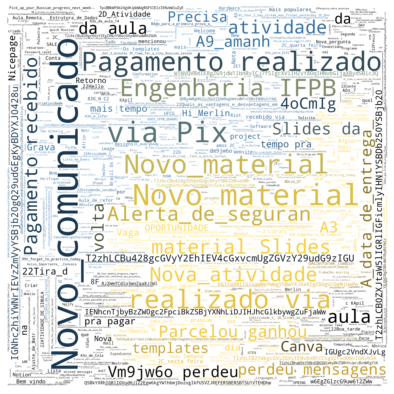

In [ ]:
text = " ".join(subject for subject in emails.subject)
print ("Wordcloud das {} palavras econtradas nos emails.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(["UTF", "B", "Q29tIGdyYW5kZSBhdW1lbnRvIGRlIHRheGEgZGUgZHJvcCwgIk5haGlkYSIgZSAiWW9pbWl5", "Q", "C3", "A26", "E2","A6","A7","3A_","8J","ISO","0A","0D","A7a","F0","de","seu","para","em","0A","0D","22Bom_dia","9F","o","A3o","2C_Pessoal","22Pessoal","2E","ao","sua","e"])
mask = np.array(Image.open("/content/drive/MyDrive/aiai.svg.png"))
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      mode="RGBA", max_words=1000,
                      mask=mask).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud.png", format="png")
plt.show()

###Questões extras